<a href="https://colab.research.google.com/github/bhupinbaral25/minor_project_2/blob/main/2_Deriving_High_level_Statistics_marketing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_marketing_data.csv to cleaned_marketing_data (1).csv


In [4]:
import csv
import ast
import numpy as np

# with open('cleaned_marketing_data (1) (1).csv', 'r') as file:
#     my_reader = csv.reader(file, delimiter=',')
#     header = next(my_reader, None) 
#     r = []
#     for row in my_reader:
#       for i in range(len(row)):
#         r.append(ast.literal_eval(row[i]))
# r

In [129]:
numpy_array = np.genfromtxt('cleaned_marketing_data (1).csv', dtype=np.int64, delimiter=",", skip_header=1)
numpy_array = np.delete(numpy_array, 0, axis=1)
np.shape(numpy_array)

(2240, 13)

In [130]:
with open('cleaned_marketing_data.csv', 'r') as file:
    my_reader = csv.reader(file, delimiter=',')
    header = next(my_reader, None) 

In [134]:
unique_list, duplicate_list = [], []
for i in range(13):
  unique, count = np.unique(numpy_array[:,i], axis=0, return_counts=True)
  unique_list.append(len(unique[count==1]))
  duplicate_list.append(len(unique[count>1]))

In [135]:
from prettytable import PrettyTable
stat_table = PrettyTable(header)
stat_table.add_row(np.append(np.array(["unique"]), unique_list))
stat_table.add_row(np.append(np.array(["duplicate"]), duplicate_list))
stat_table.add_row(np.append(np.array(["mean"]), np.mean(numpy_array, axis=0)))
stat_table.add_row(np.append(np.array(["S.D"]), np.std(numpy_array, axis=0)))
stat_table.add_row(np.append(np.array(["min"]), np.min(numpy_array, axis=0)))
stat_table.add_row(np.append(np.array(["max"]), np.max(numpy_array, axis=0)))
stat_table.add_row(np.append(np.array(["25%"]), np.percentile(numpy_array, 25, axis=0)))
stat_table.add_row(np.append(np.array(["50%"]), np.percentile(numpy_array, 50, axis=0)))
stat_table.add_row(np.append(np.array(["75%"]), np.percentile(numpy_array, 75, axis=0)))
print(stat_table)

+-----------+--------------------+-----------+----------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+---------+--------------------+
|           |     year_birth     | education | marital_status |       income       |      mntwines      |     mntfruits      |  mntmeatproducts   |  mntsweetproducts |   mntgoldprods   |  numwebpurchases   | numstorepurchases  | country |   children_home    |
+-----------+--------------------+-----------+----------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+---------+--------------------+
|   unique  |         5          |     0     |       0        |        1756        |        353         |         19         |        234         |         35        |        41        |         2          |         0   

In [142]:
# import matplotlib.pyplot as plt
# column = header
# rows = ["unique","duplicate","mean","S.D","min","max","25%","50%","75%",]
# cell_text = [unique_list, duplicate_list, np.mean(numpy_array, axis=0), np.std(numpy_array, axis=0), np.min(numpy_array, axis=0), np.max(numpy_array, axis=0), np.percentile(numpy_array, 25, axis=0), np.percentile(numpy_array, 50, axis=0), np.percentile(numpy_array, 75, axis=0) ]
# the_table = plt.table(cellText=cell_text,
#                       rowLabels=rows,
#                       colLabels=column
#                       )

In [141]:
#For checking
import pandas as pd
df = pd.read_csv('cleaned_marketing_data.csv')
df.describe()

,Unnamed: 0,year_birth,education,marital_status,income,mntwines,mntfruits,mntmeatproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numstorepurchases,country,children_home
count,2186.000000,2186.000000,2186.00000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,1120.695791,1968.787283,2.39570,3.732388,51729.756176,304.183440,26.276761,205.204026,27.098811,44.107502,4.096066,5.787283,4.429552,0.948765
std,646.985254,11.996683,1.12242,1.075299,25711.476871,336.497385,39.663860,261.721589,41.291101,52.255479,2.786353,3.251761,2.208332,0.749756
min,0.000000,1893.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,560.250000,1959.000000,2.00000,3.000000,34759.500000,23.000000,2.000000,21.000000,1.000000,9.000000,2.000000,3.000000,3.000000,0.000000
50%,1120.500000,1970.000000,2.00000,4.000000,51117.500000,174.500000,8.000000,80.500000,8.000000,24.000000,4.000000,5.000000,6.000000,1.000000
75%,1680.750000,1977.000000,3.00000,5.000000,68307.250000,505.000000,33.000000,306.750000,33.750000,56.000000,6.000000,8.000000,6.000000,1.000000
max,2239.000000,1996.000000,4.00000,7.000000,666666.000000,1493.000000,199.000000,1727.000000,263.000000,362.000000,27.000000,13.000000,7.000000,3.000000


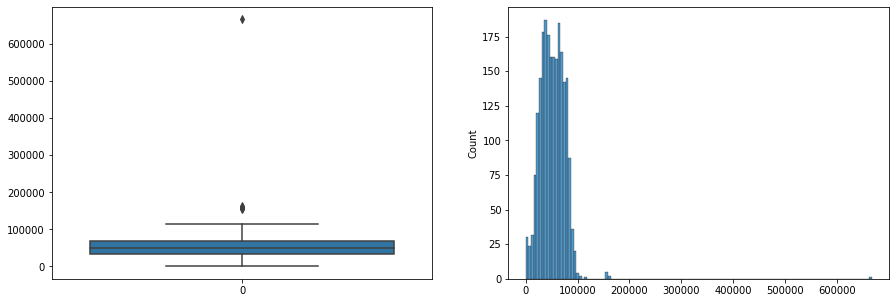

In [138]:
#Outlier Detection
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = numpy_array[:,3])
plt.subplot(1,2,2)
sns.histplot(numpy_array[:,3])

The histogram is skewed right, the median is less than the mean.




In [ ]:
# To find the percentage of outlier in income.
count=0
for i in numpy_array[:,3]:
  if i > np.percentile(numpy_array[:,3], 90, axis=0):
    count+=1 

outlier_percentage = (count/len(numpy_array[:,3]))*100
outlier_percentage

10.01829826166514

Also, there are 24 missing datas in income field. so the best approach would be to replace those missing values and also the outliers with the median value.

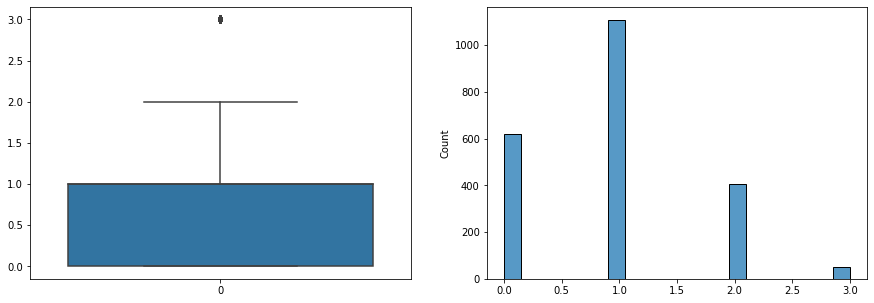

In [ ]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.boxplot(data = numpy_array[:,12])
# plt.subplot(1,2,2)
# sns.histplot(numpy_array[:,12])